# Case Study 1: Linear Regression
### Laura Ahumada, Kevin Boyd, Shikha Pandey
##### Southern Methodist University
##### Fall, 2023

### Goal: Build a linear regression model using L1 or L2 regularization (or both) the task to predict the Critical Temperature as closely as possible. In addition, to include which variable carries the most importance.

### Libraries

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

In [2]:
# Read Data
conductor=pd.read_csv("train.csv")
elements=pd.read_csv("unique_m.csv")

### Data Preparation

In [3]:
# Merge based on index
data = pd.concat([ elements.iloc[:,:-2],conductor], axis=1)

In [4]:
# Look at the data
data.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


### 21,263 records and 167 features + the dependent variable

In [5]:
# Data size
data.shape

(21263, 168)

In [6]:
# Columns in data where all values are 0
data.columns[(data == 0).all()]

Index(['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn'], dtype='object')

In [7]:
# These columns can be dropped from dataset
drop_columns = data.columns[(data == 0).all()]
data = data.drop(drop_columns, axis=1)

In [8]:
# Checking data size after dropping columns
data.shape

(21263, 159)

### The distribution of the response variable is right skewed, there seems to be a big outlier.

In [9]:
# Checking the dependent variable
data["critical_temp"].describe()

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

In [10]:
# Top 5 critical temperatures
data['critical_temp'].nlargest(5)

20573    185.0
3985     143.0
5200     143.0
19039    137.4
1341     136.0
Name: critical_temp, dtype: float64

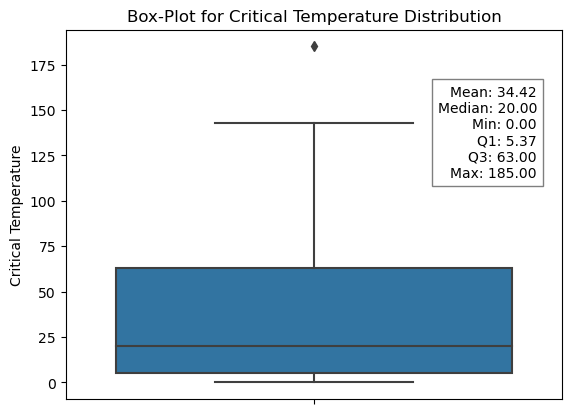

In [11]:
# Box Plot for Critical Temperature
ax = sns.boxplot(y=data["critical_temp"])

# Calculate statistics
mean = data["critical_temp"].mean()
median = data["critical_temp"].median()  
minimum = data["critical_temp"].min()
maximum = data["critical_temp"].max()
q1 = data["critical_temp"].quantile(0.25)
q3 = data["critical_temp"].quantile(0.75)

# Annotate the plot with statistics
stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nMin: {minimum:.2f}\nQ1: {q1:.2f}\nQ3: {q3:.2f}\nMax: {maximum:.2f}"
plt.gca().text(0.95, 0.85, stats_text, transform=plt.gca().transAxes,
               fontsize=10, va='top', ha='right', color='black', bbox=dict(facecolor='white', alpha=0.5))

# Add title to the plot
plt.title("Box-Plot for Critical Temperature Distribution")
plt.ylabel("Critical Temperature")

# Show the plot
plt.show()

In [12]:
# There are a lot between 135-143 
data["critical_temp"].nlargest(8)

20573    185.0
3985     143.0
5200     143.0
19039    137.4
1341     136.0
1343     136.0
5476     135.8
7105     135.7
Name: critical_temp, dtype: float64

Text(0.5, 0, 'Critical Temperature')

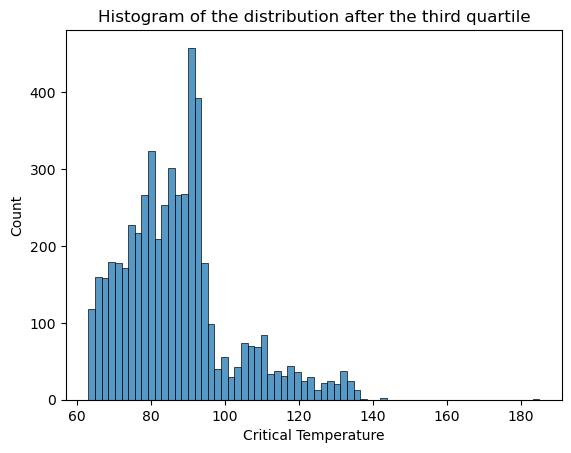

In [13]:
# Checking the distribution after the third quartile
# The count of conducturs are less but there are still quite a few up to 143
data[data["critical_temp"]>63]["critical_temp"]
sns.histplot(x=data[data["critical_temp"]>63]["critical_temp"])
plt.title("Histogram of the distribution after the third quartile")
plt.xlabel("Critical Temperature")

##### + As assumed earlier it is more of a bi-modal distribution one around 0 and another one around 82
+ Would be interesting to see if the conductor that reaches 185 for critical temp is correct of it is a mistake. There is only 1 at 185 followed a bunch that reach 143 and less.

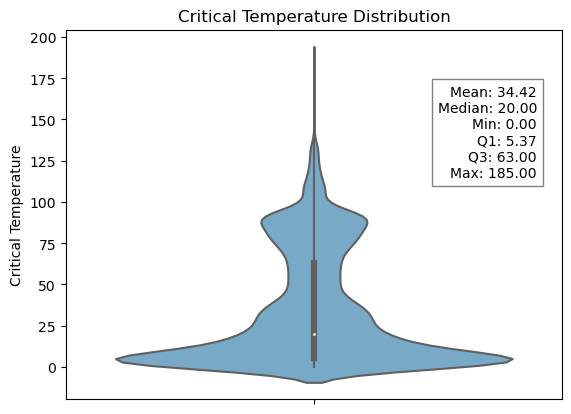

In [14]:
# Create the combined box and violin plot
ax = sns.violinplot(y=data["critical_temp"], inner="box", palette="Blues")

# Calculate statistics
mean = data["critical_temp"].mean()
median = data["critical_temp"].median()  # Median (Q2)
minimum = data["critical_temp"].min()
maximum = data["critical_temp"].max()
q1 = data["critical_temp"].quantile(0.25)
q3 = data["critical_temp"].quantile(0.75)

# Annotate the plot with statistics
stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nMin: {minimum:.2f}\nQ1: {q1:.2f}\nQ3: {q3:.2f}\nMax: {maximum:.2f}"
plt.gca().text(0.95, 0.85, stats_text, transform=plt.gca().transAxes,
               fontsize=10, va='top', ha='right', color='black', bbox=dict(facecolor='white', alpha=0.5))

# Add title to the plot
plt.title("Critical Temperature Distribution")
plt.ylabel("Critical Temperature")

# Show the plot
plt.show()

# EDA

##### Checking the distributions of variables in Conductor data
+ Target - As we have noticed that our target variable - 'critial_temp' is right skewed with presence of outliers.
+ Atomic Mass variables - Most of them are right skewed. 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass' and 'range_atomic_mass' appear to be left skewed.
+ Fie variables - 'mean_fie' and 'gmean_fie' are right skewed. 'wtd_mean_fie' and 'wtd_gmean_fie' seem to have binomial distribution, 'entropy_fie' has discrete data with multinomial distribution and 'wtd_entropy_fie' looks to have normal distribution. 'range_fie', 'wtd_range_fie', 'std_fie' and 'wtd_std_fie' appear to have binomial distribution.
+ Atomic Radius variables - 'mean_atomic_radius' and 'gmean_atomic_radius' seem to have normal distribution, where as 'wtd_mean_atomic_radius' and 'wtd_gmean_atomic_radius' are right skewed.'entropy_atomic_radius' has discrete data with multinomial distribution and 'wtd_entropy_atomic_radius' appears to have binomial distribution. 'range_atomic_radius', 'std_atomic_radius' and 'wtd_std_atomic_radius' are left skewed, whereas 'wtd_range_atomic_radius' is right skewed.
+ Density variables - Most of them are right skewed. 'gmean_Density' looks to have binomial whereas 'entropy_Density' with a multinomial distribution. 'wtd_entropy_Density' appears to have normal distribution.
+ Electron Affinity variables - Most of them appear to have right skewed distributions, with the exception of 'entropy_ElectronAffinity' being left skewed.
+ Fusion Heat variables -  Most of them have right skewed distributions with exception of 'entropy_FusionHeat' which has discrete data with multinomial distribution and 'wtd_entropy_FusionHeat' being left skewed.
+ Thermal Conductivity variables - Most of them have right skewed distributions. 'entropy_ThermalConductivity' looks to be normally distributed whereas 'wtd_entropy_ThermalConductivity', 'range_ThermalConductivity', 'std_ThermalConductivity' and 'wtd_std_ThermalConductivity' appear to have binomial distribution.
+ Valence variables - Almost all are right skewed, other than 'entropy_valence' which looks like discrete data with multinomial distribution and 'wtd_entropy_valence' which looks to have left skewed distribution.

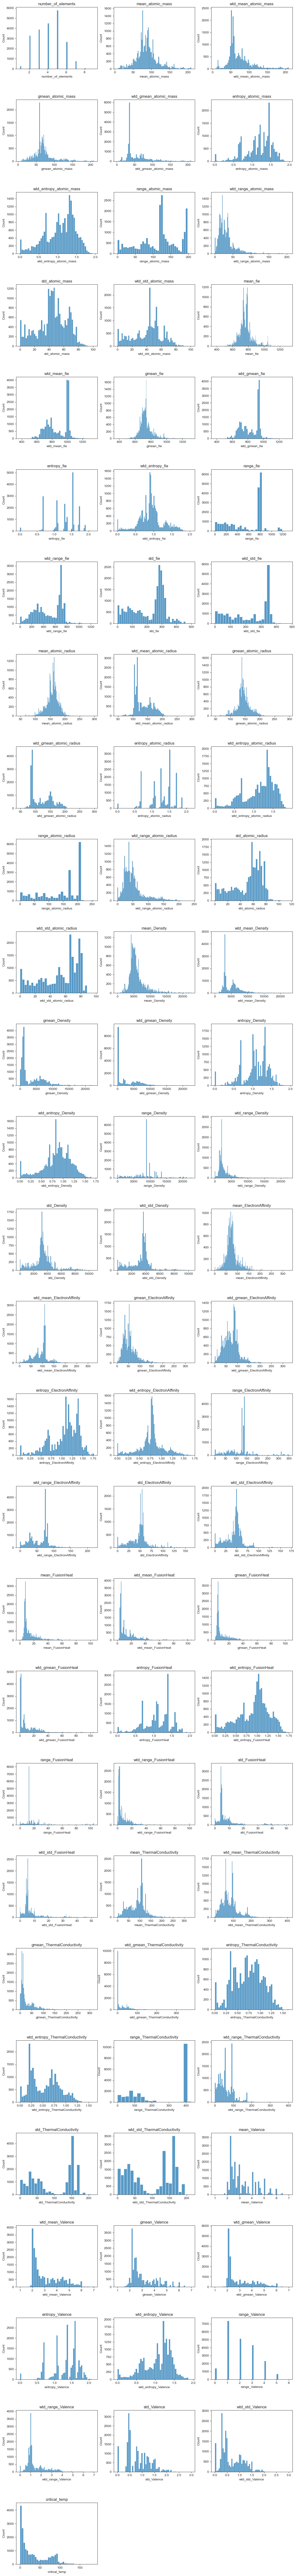

In [15]:
import math

# Using conductor as DataFrame
num_columns = len(conductor.columns)
num_rows = math.ceil(num_columns / 3)

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size here

sns.set_style("ticks")
for idx, col in enumerate(conductor.columns, start=1):
    plt.subplot(num_rows, 3, idx)
    sns.histplot(data=conductor[col], kde=False)
    plt.title(col)
plt.subplots_adjust(hspace=0.5)
plt.show()

<AxesSubplot:>

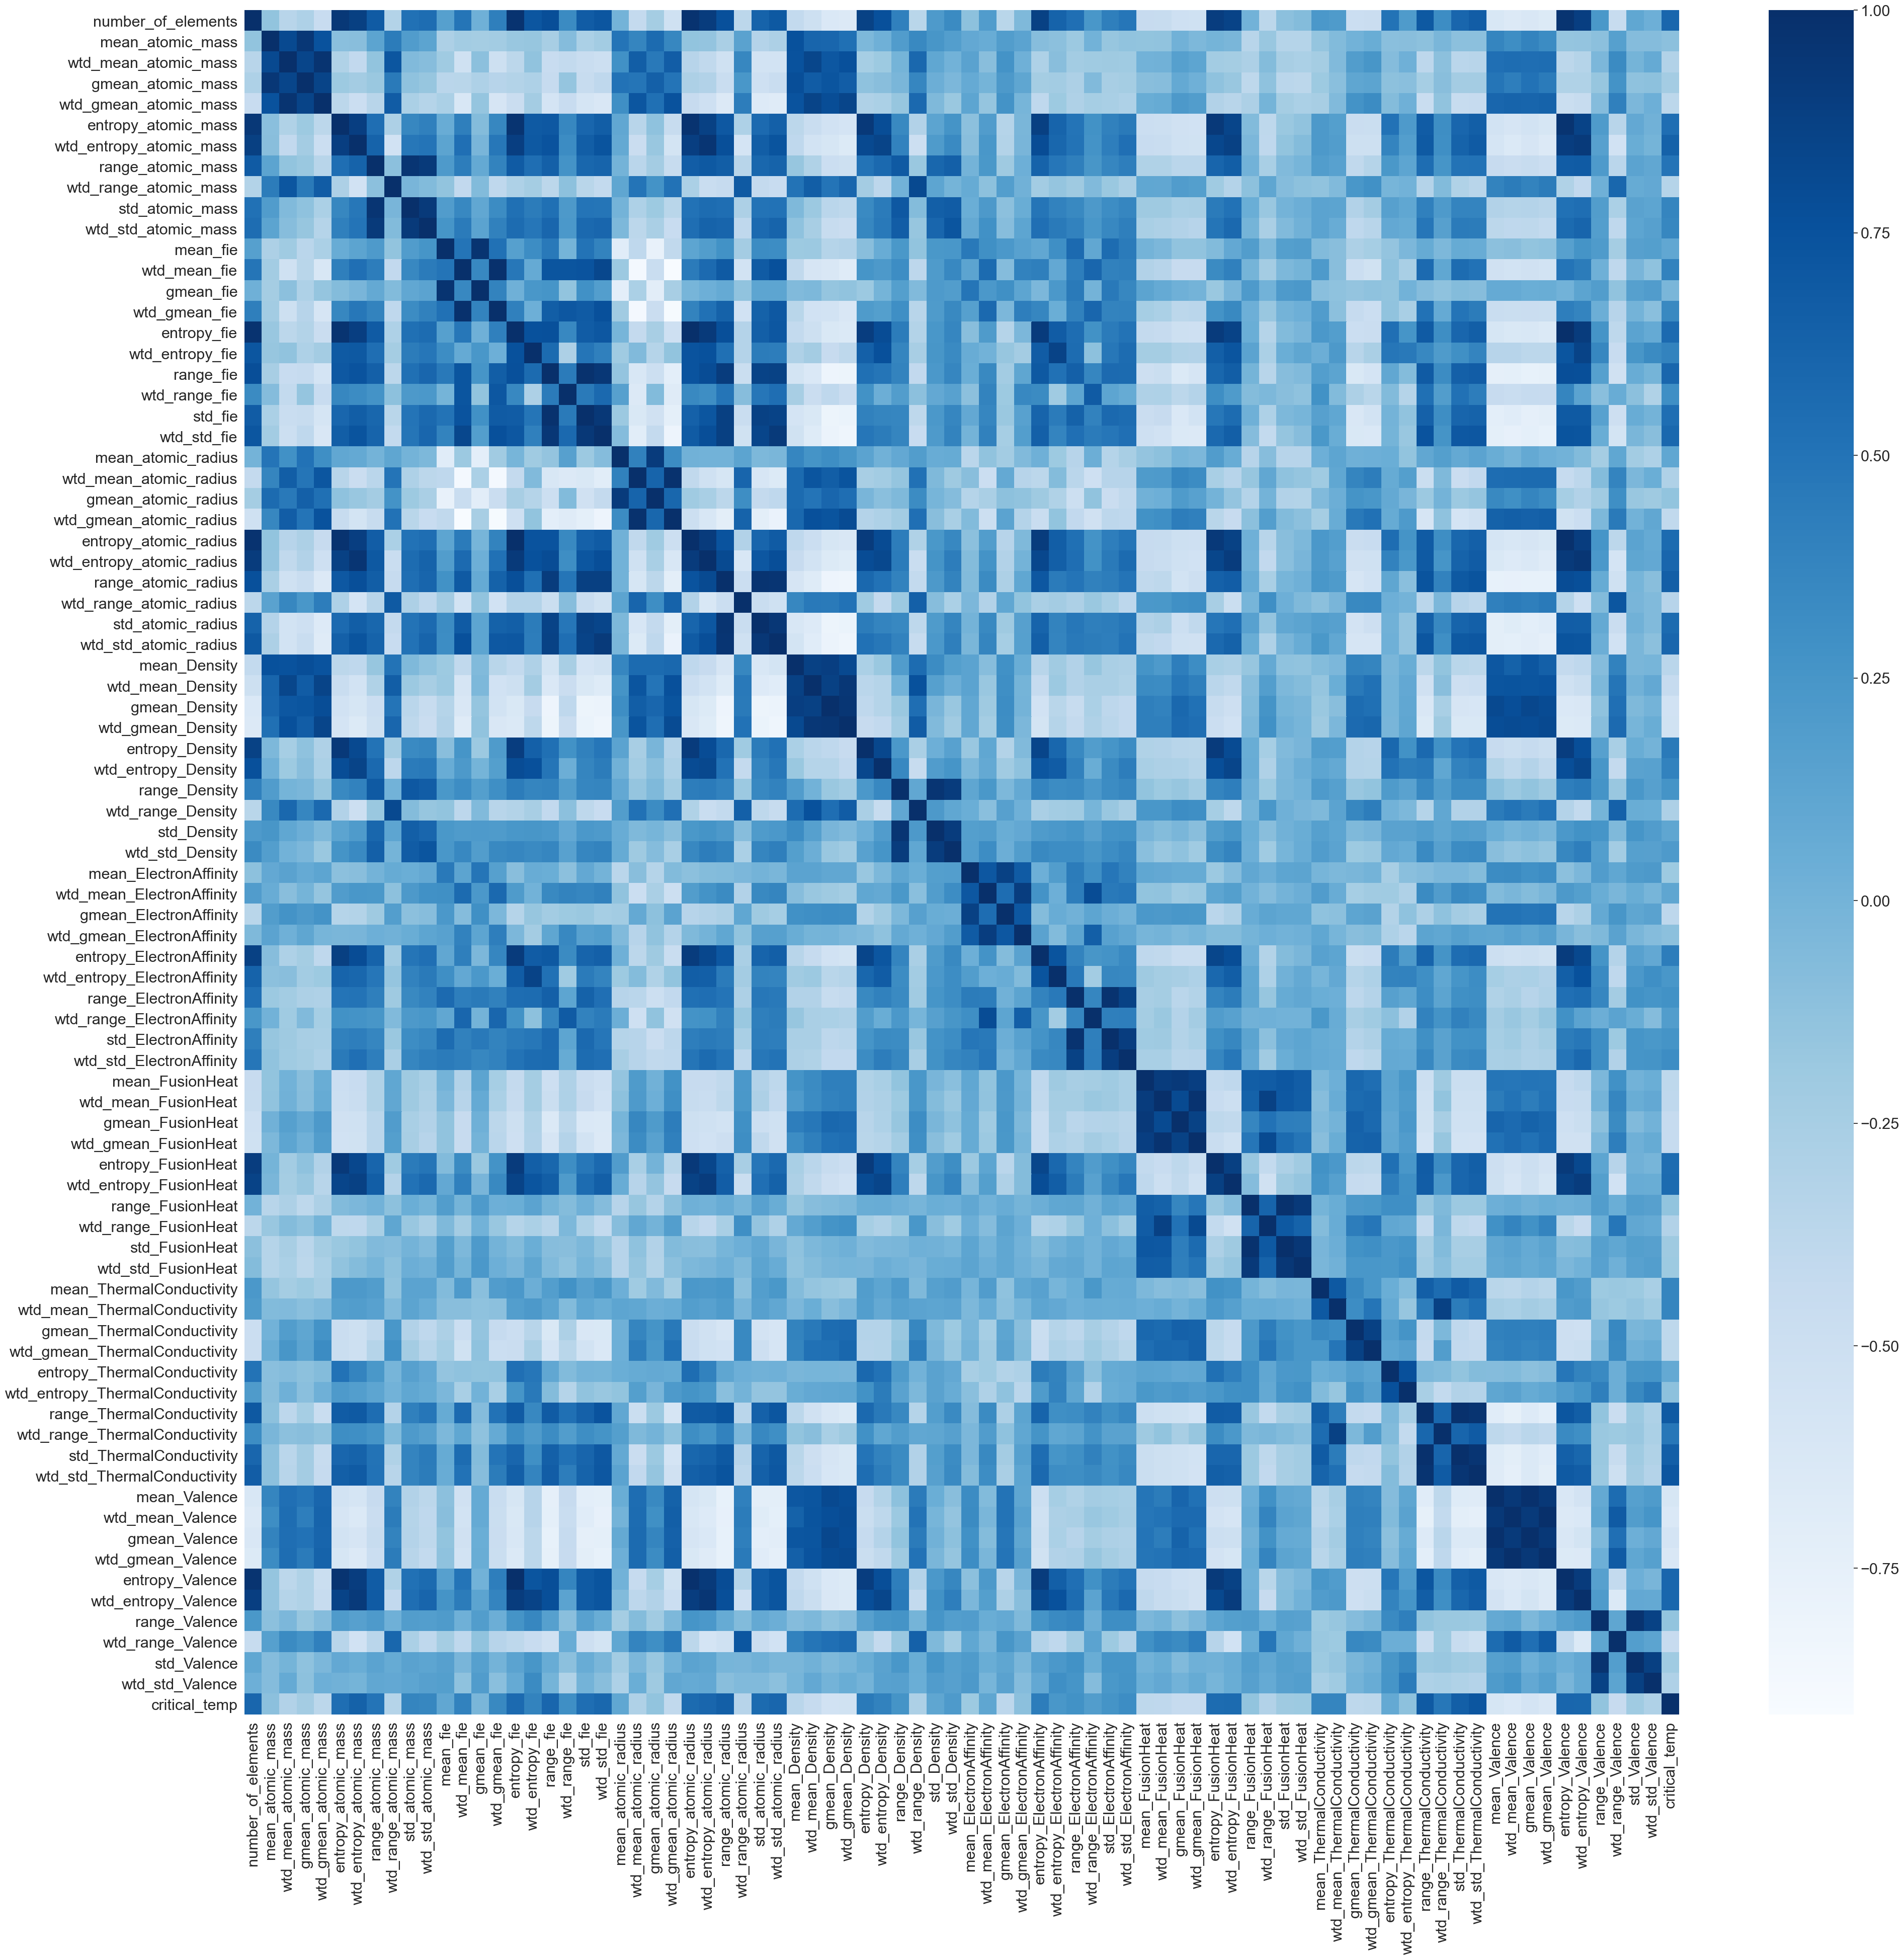

In [16]:
# Correlation
plt.figure(figsize=(46,44))
sns.set(font_scale=2)
sns.heatmap(conductor.corr(), annot=False, cmap="Blues")

+ Based on above plot, we choose to have a closer look at correlation for atomic mass and atomic radius related variables.

<AxesSubplot:title={'center':'Atomic Mass Measurment Correlations'}>

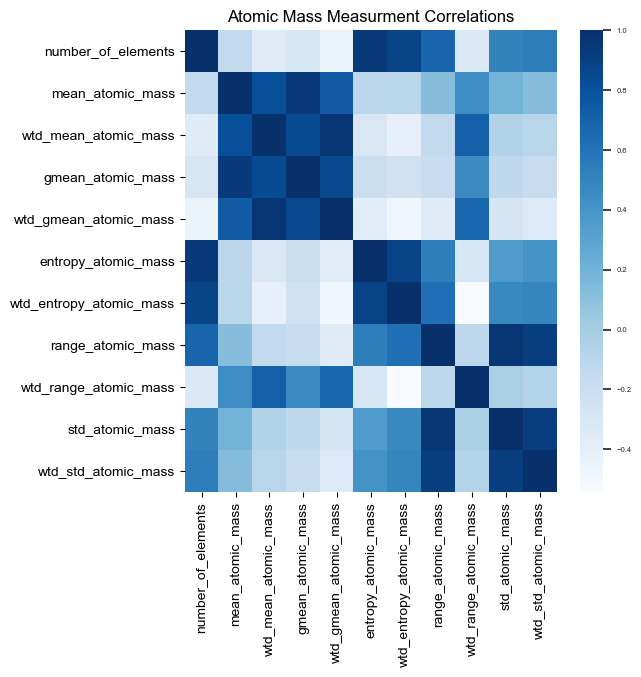

In [44]:
# Correlation for atomic mass related variables
plt.rcParams['figure.figsize'] = [6,6]
plt.title("Atomic Mass Measurment Correlations")
sns.set(font_scale=0.5)
sns.heatmap(conductor.iloc[:,:11].corr(),cmap="Blues")

<AxesSubplot:title={'center':'Atomic Radius Measurment Correlations'}>

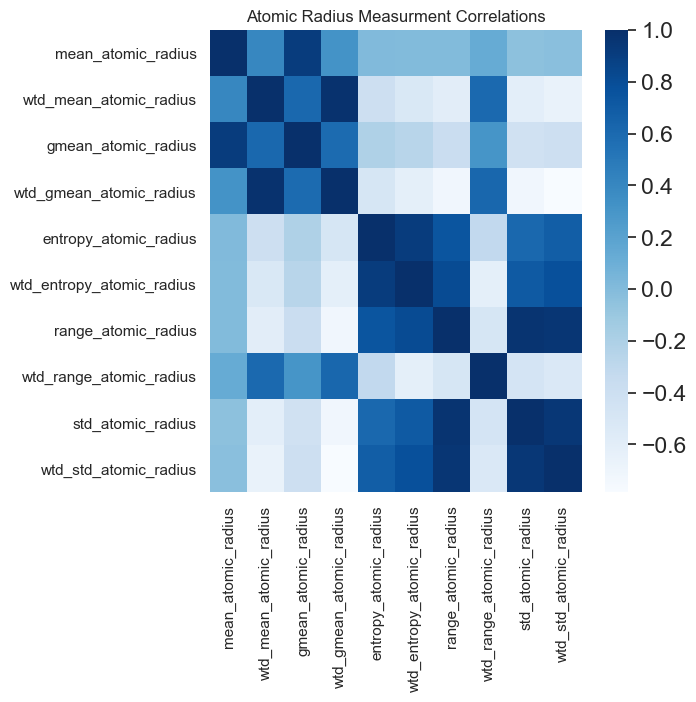

In [48]:
# Correlation for atomic radius related variables
plt.rcParams['figure.figsize'] = [6,6]
plt.title("Atomic Radius Measurment Correlations")
sns.set(font_scale=1.5)
sns.heatmap(conductor.iloc[:,21:31].corr(),cmap="Blues")

+ All numeric data

In [19]:
# All data is numeric
data.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

# Model

+ Set x and y
+ Standarize all the variables that are not the elements since the elements are dummies

In [20]:
# Scale data
from sklearn import preprocessing

x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

# Standarize all the non_element variables leaving the dummies alone
columns_to_standardize = x.iloc[:,77:].columns
data_to_standardize = conductor[columns_to_standardize]

standardized_data = preprocessing.StandardScaler().fit_transform(data_to_standardize)

# Replace the original columns with the standardized data
x[columns_to_standardize] = standardized_data

## Lasso and Ridge with Cross Validation Score method

In [21]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

n_splits = 10
splitter = KFold(shuffle=True, n_splits=n_splits)
lambdas = np.logspace(-6, 6, 20)
all_scores_ridge = []
all_scores_lasso = []
alphas = []

for lambda_ in lambdas:
    ridgemodel = Ridge(alpha=lambda_)
    lassomodel = Lasso(alpha=lambda_)

# Ridge Cross-Validation
    ridge_scores = cross_val_score(ridgemodel, x, y, cv=splitter, scoring='neg_mean_absolute_error')
    all_scores_ridge.append(ridge_scores)


# Lasso Cross-Validation
    lasso_scores = cross_val_score(lassomodel, x, y, cv=splitter, scoring='neg_mean_absolute_error')
    all_scores_lasso.append(lasso_scores)

    alphas.append([lambda_] * n_splits)

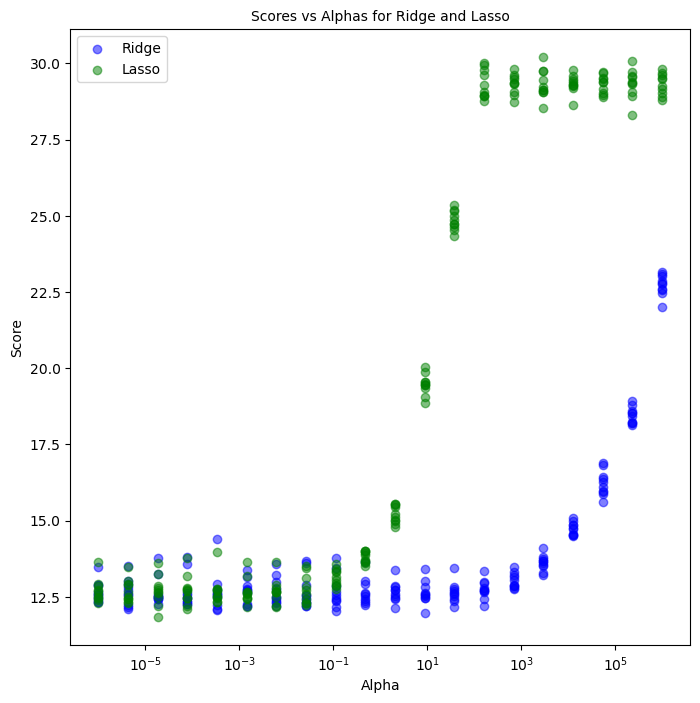

In [49]:
# Scatter plot for Ridge and Lasso
plt.style.use('default')  # Use the default style
plt.figure(figsize=(8, 8))
plt.title('Scores vs Alphas for Ridge and Lasso', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.xlabel('Alpha', fontsize=10)

# Scatter plot for Ridge
plt.scatter(alphas, -np.array(all_scores_ridge).ravel(), label='Ridge', color='blue', alpha =0.5)
# Scatter plot for Lasso
plt.scatter(alphas, -np.array(all_scores_lasso).ravel(), label='Lasso', color='green', alpha =0.5)

plt.xscale('log')
plt.legend()
plt.show()

## Lasso using Grid Search

In [23]:
from sklearn.model_selection import GridSearchCV

lasso_model = Lasso()
n_splits = 10
splitter = KFold(shuffle=True, n_splits=n_splits)
params = {'alpha': np.logspace(-6,6,20)}
lasso_grid_search = GridSearchCV(lasso_model, params, cv=splitter, n_jobs = -1, scoring='neg_mean_squared_error')
lasso_grid_search.fit(x, y)

best_lasso_score = lasso_grid_search.best_score_
best_lasso_alpha = lasso_grid_search.best_params_['alpha']
best_lasso_model = lasso_grid_search.best_estimator_

In [24]:
best_lasso_score

-339.8110444473796

In [25]:
best_lasso_alpha

0.4832930238571752

In [26]:
best_lasso_model

Lasso(alpha=0.4832930238571752)

In [27]:
from sklearn.model_selection import cross_val_predict

lasso_predictions = cross_val_predict(best_lasso_model, x, y, cv=splitter)
lasso_predictions = lasso_predictions.reshape(21263,1)

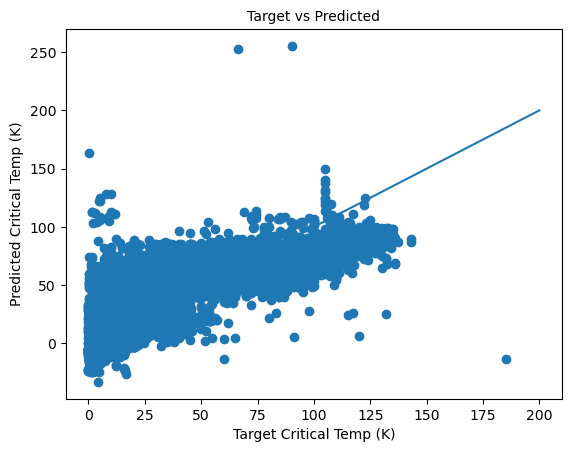

In [28]:
# Target vs predicted
plt.style.use('default')  # Use the default style
plt.title('Target vs Predicted', fontsize=10) 
plt.ylabel('Predicted Critical Temp (K)', fontsize=10)
plt.xlabel('Target Critical Temp (K)', fontsize=10) 
plt.scatter(y, lasso_predictions)
plt.plot(np.linspace(0,200,500),np.linspace(0,200,500))

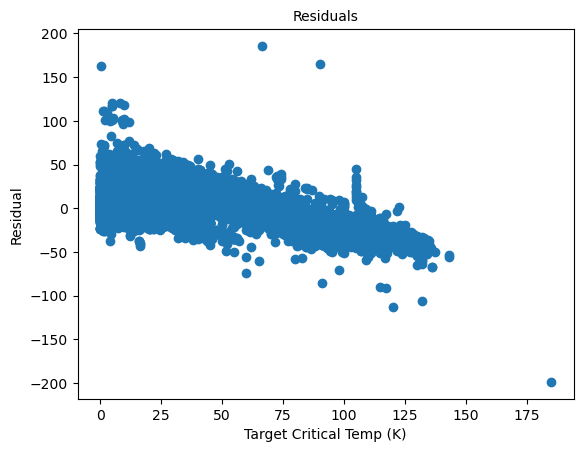

In [29]:
# Residuals
plt.style.use('default')  # Use the default style
plt.title('Residuals', fontsize=10) 
plt.ylabel('Residual', fontsize=10)
plt.xlabel('Target Critical Temp (K)', fontsize=10) 
plt.scatter(y, lasso_predictions-y)

In [30]:
# Calculate feature importances (absolute values of coefficients)
lasso_actual_coef = best_lasso_model.coef_
lasso_importances = np.abs(best_lasso_model.coef_)
lasso_features = x.columns

# Create a DataFrame to hold feature importances and sort it
lasso_importance_df = pd.DataFrame({'Feature': lasso_features, 'Importance': lasso_importances, 'ActualCoef': lasso_actual_coef})
lasso_importance_df = lasso_importance_df[lasso_importance_df["Importance"]>0]
lasso_importance_df = lasso_importance_df.sort_values(by='Importance', ascending=False)

In [31]:
lasso_importance_df.head(n=10)

,Feature,Importance,ActualCoef
50,Ba,9.573920,9.573920
139,wtd_mean_ThermalConductivity,7.978479,7.978479
141,wtd_gmean_ThermalConductivity,6.312190,-6.312190
147,wtd_std_ThermalConductivity,4.317690,4.317690
76,Bi,4.007050,4.007050
157,wtd_std_Valence,3.994539,-3.994539
83,wtd_entropy_atomic_mass,3.892439,3.892439
121,wtd_gmean_ElectronAffinity,3.792394,-3.792394
16,Ca,3.661791,3.661791
84,range_atomic_mass,3.467950,3.467950


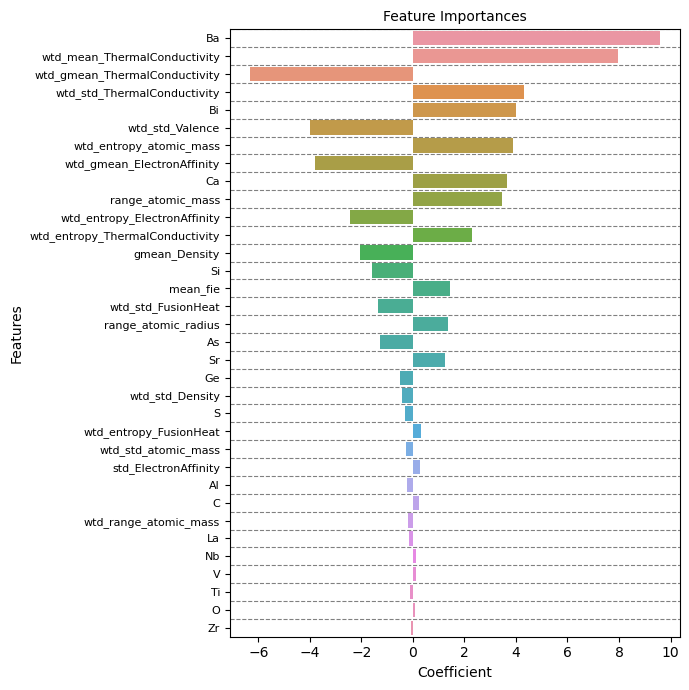

In [32]:
plt.figure(figsize=(7, 7))

# Set the style to have a white background
plt.style.use('default')  # Use the default style
sns.barplot(y=lasso_importance_df["Feature"], x=lasso_importance_df["ActualCoef"])

plt.title('Feature Importances', fontsize=10) 
plt.ylabel('Features', fontsize=10)
plt.xlabel('Coefficient', fontsize=10) 

tick_positions = range(len(lasso_importance_df["Feature"]))
tick_labels = lasso_importance_df["Feature"]
plt.yticks(tick_positions, tick_labels, fontsize=8) 

for pos in tick_positions:
    plt.axhline(y=pos - 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()

plt.show()

## Ridge using Grid Search

In [33]:
ridge_model = Ridge()
n_splits = 10
splitter = KFold(shuffle=True, n_splits=n_splits)
params = {'alpha': np.logspace(-6,6,20)}
ridge_grid_search = GridSearchCV(ridge_model, params, cv=splitter, n_jobs = -1, scoring='neg_mean_squared_error')
ridge_grid_search.fit(x, y)

best_ridge_score = ridge_grid_search.best_score_
best_ridge_alpha = ridge_grid_search.best_params_['alpha']
best_ridge_model = ridge_grid_search.best_estimator_

In [34]:
best_ridge_score

-335.4729558402092

In [35]:
best_ridge_alpha

2976.3514416313133

In [36]:
best_ridge_model

Ridge(alpha=2976.3514416313133)

In [37]:
from sklearn.model_selection import cross_val_predict

ridge_predictions = cross_val_predict(best_ridge_model, x, y, cv=splitter)

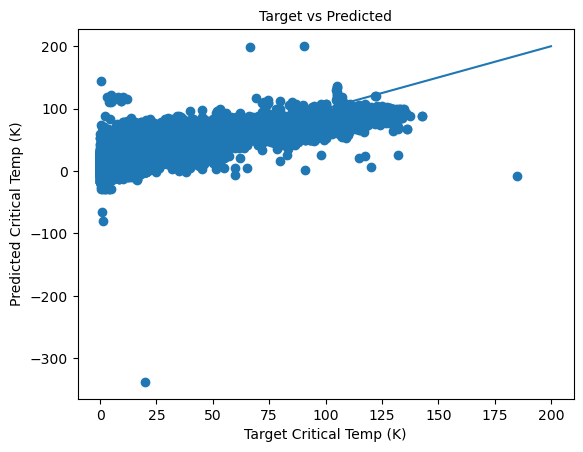

In [38]:
# Target vs predicted
plt.title('Target vs Predicted', fontsize=10) 
plt.ylabel('Predicted Critical Temp (K)', fontsize=10)
plt.xlabel('Target Critical Temp (K)', fontsize=10) 
plt.scatter(y, ridge_predictions)
plt.plot(np.linspace(0,200,500),np.linspace(0,200,500))

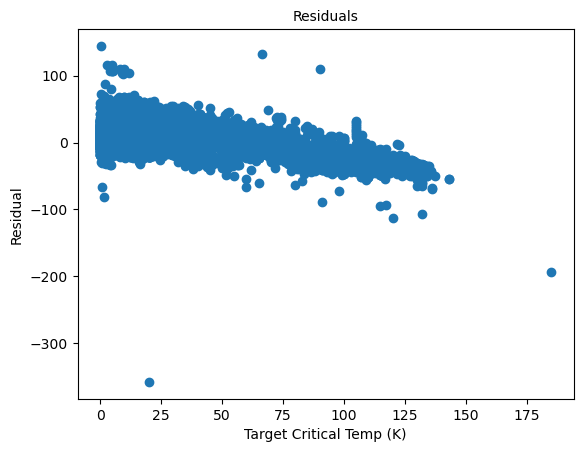

In [39]:
# Residuals
plt.title('Residuals', fontsize=10) 
plt.ylabel('Residual', fontsize=10)
plt.xlabel('Target Critical Temp (K)', fontsize=10) 
plt.scatter(y, ridge_predictions-y)

In [40]:
# Calculate feature importances (absolute values of coefficients)
ridge_actual_coef = best_ridge_model.coef_.reshape(158,)
ridge_importances = np.abs(ridge_actual_coef)
ridge_features = x.columns

# Create a DataFrame to hold feature importances and sort it
ridge_importance_df = pd.DataFrame({'Feature': ridge_features, 'Importance': ridge_importances, 'ActualCoef': ridge_actual_coef})
ridge_importance_df = ridge_importance_df.sort_values(by='Importance', ascending=False)

In [41]:
ridge_importance_df.head(n=10)

,Feature,Importance,ActualCoef
50,Ba,7.405116,7.405116
157,wtd_std_Valence,4.040834,-4.040834
139,wtd_mean_ThermalConductivity,3.958378,3.958378
147,wtd_std_ThermalConductivity,3.544033,3.544033
76,Bi,3.460322,3.460322
141,wtd_gmean_ThermalConductivity,3.133013,-3.133013
16,Ca,3.131764,3.131764
84,range_atomic_mass,3.099940,3.099940
123,wtd_entropy_ElectronAffinity,2.942656,-2.942656
121,wtd_gmean_ElectronAffinity,2.708341,-2.708341


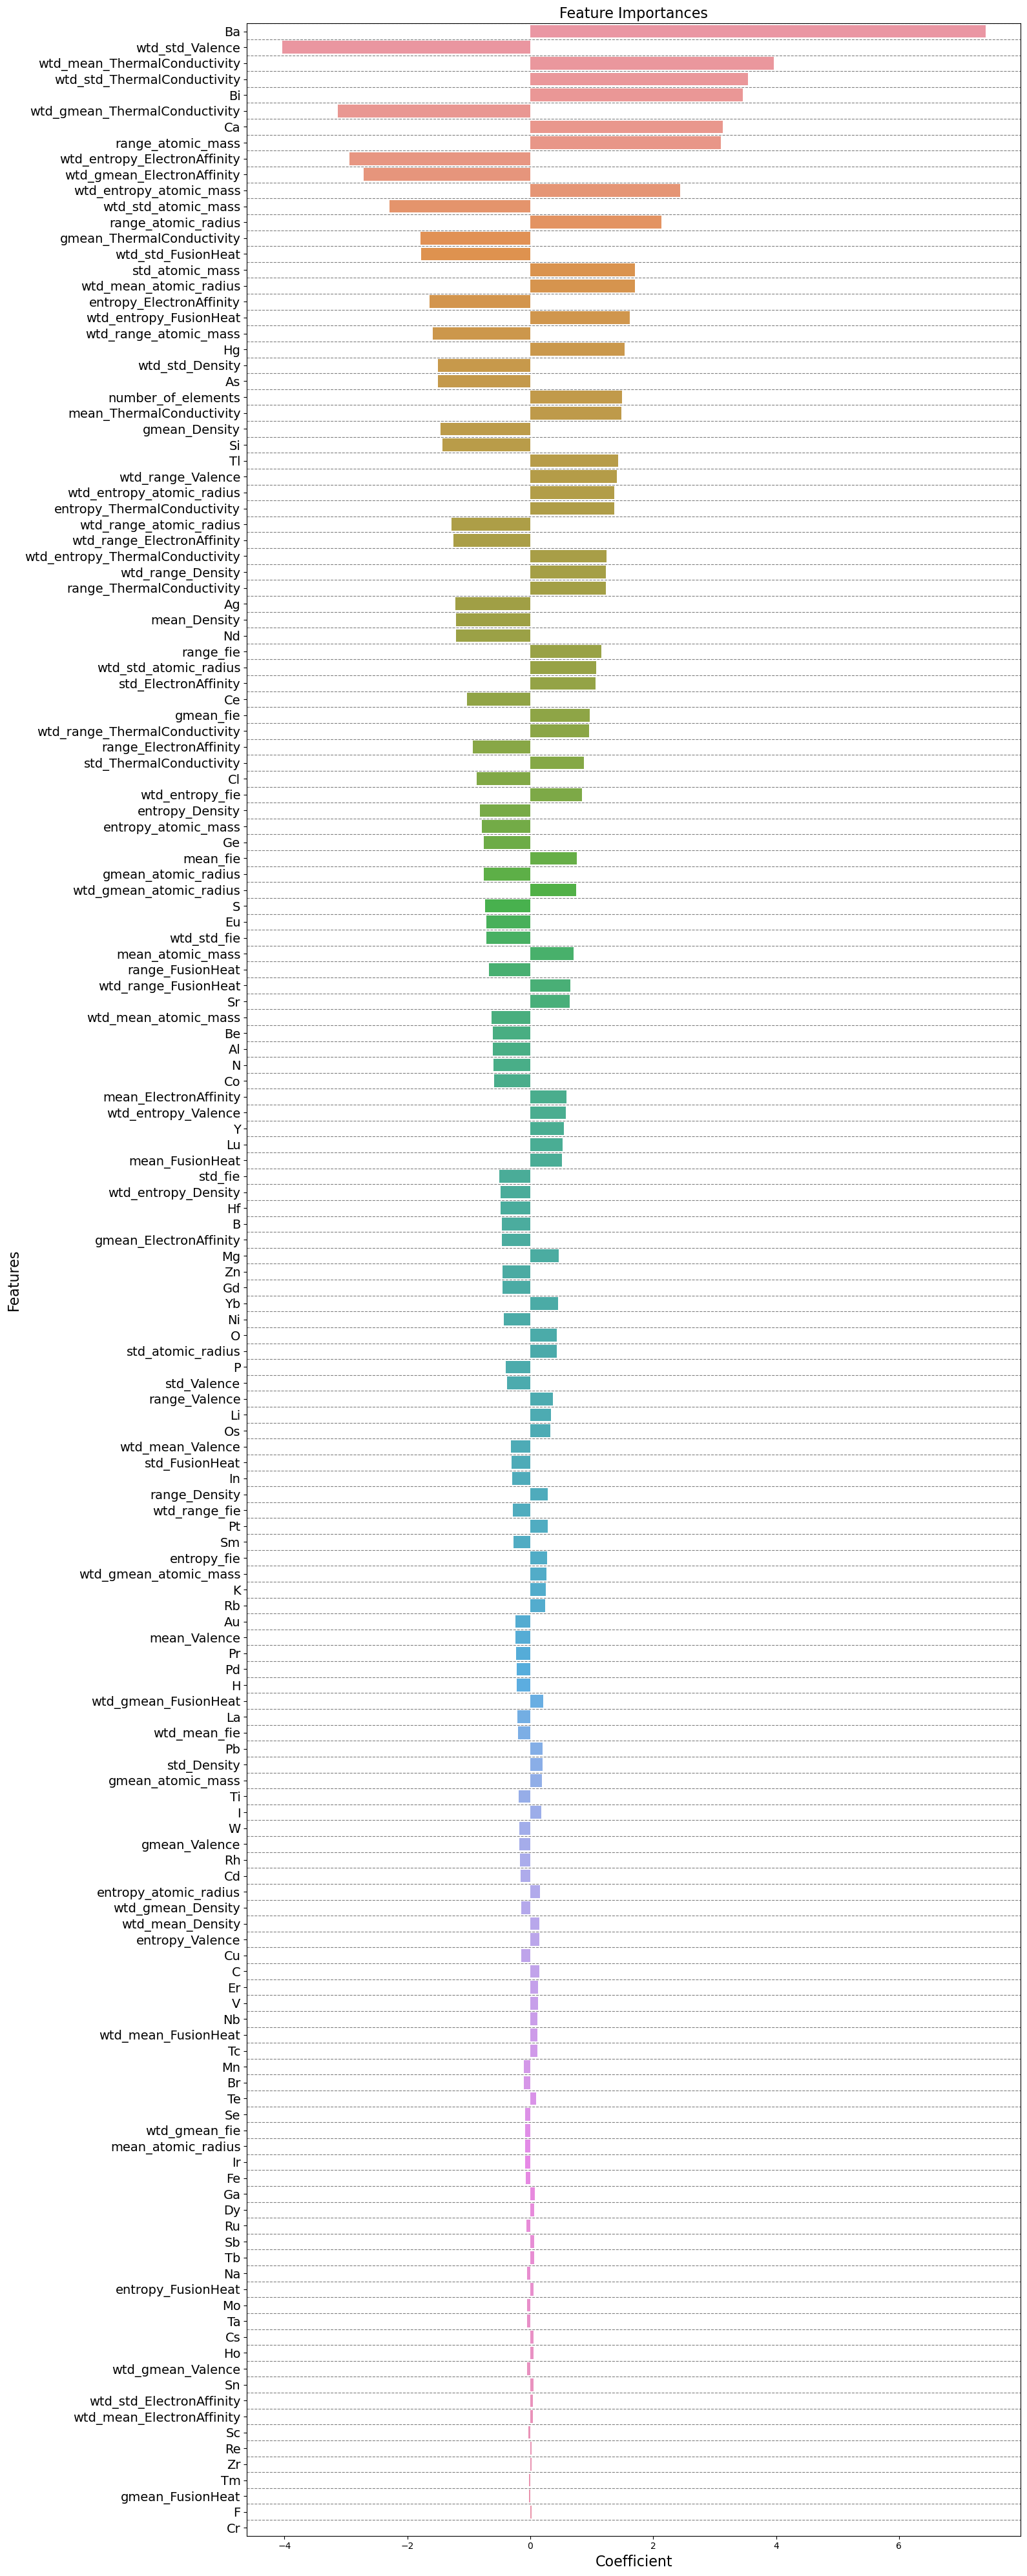

In [42]:
plt.figure(figsize=(16, 40))

# Set the style to have a white background
plt.style.use('default')  # Use the default style
sns.barplot(y=ridge_importance_df["Feature"], x=ridge_importance_df["ActualCoef"])

plt.title('Feature Importances', fontsize=16) 
plt.ylabel('Features', fontsize=16)
plt.xlabel('Coefficient', fontsize=16)

tick_positions = range(len(ridge_importance_df["Feature"]))
tick_labels = ridge_importance_df["Feature"]
plt.yticks(tick_positions, tick_labels, fontsize=14) 

for pos in tick_positions:
    plt.axhline(y=pos - 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()

plt.show()

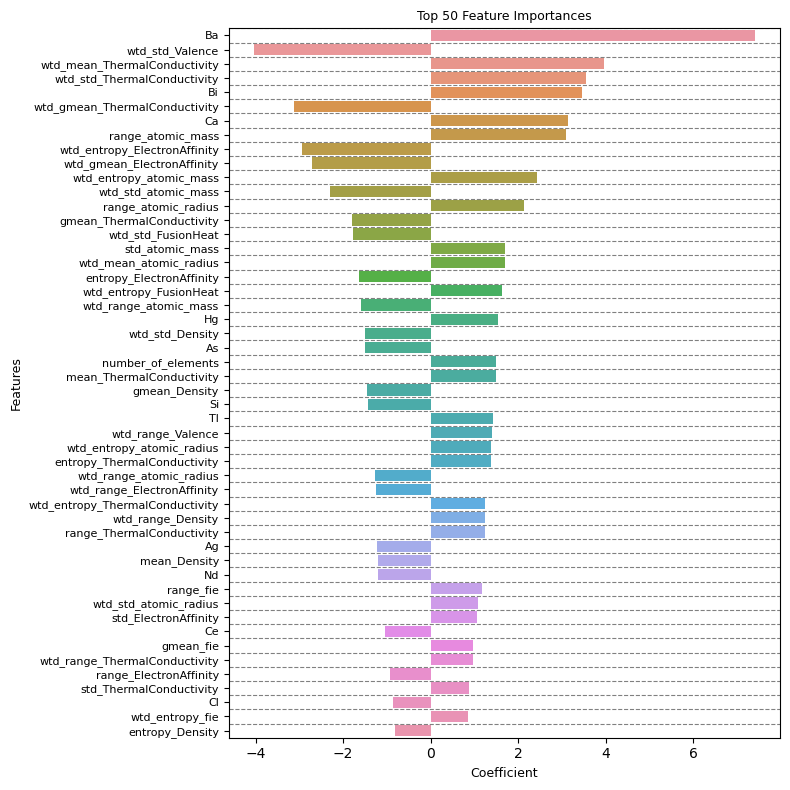

In [43]:
# Top 50 Ridge feature importances
ridge_topn_imp_df = ridge_importance_df.head(n=50)
plt.figure(figsize=(8, 8))

# Set the style to have a white background
plt.style.use('default')  # Use the default style
sns.barplot(y=ridge_topn_imp_df["Feature"], x=ridge_topn_imp_df["ActualCoef"])

plt.title('Top 50 Feature Importances', fontsize=9) 
plt.ylabel('Features', fontsize=9)
plt.xlabel('Coefficient', fontsize=9)

tick_positions = range(len(ridge_topn_imp_df["Feature"]))
tick_labels = ridge_topn_imp_df["Feature"]
plt.yticks(tick_positions, tick_labels, fontsize=8) 

for pos in tick_positions:
    plt.axhline(y=pos - 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()

plt.show()